In [1]:
import pandas as pd
diabetes_data = pd.read_csv(r"C:\Users\tejap\PDS-Assignment-3,4\Assignment - 4\Raw_Data\diabetes.csv")

diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Sample Mean Glucose: 129.28
Sample Highest Glucose: 198
Population Mean Glucose: 120.89453125
Population Highest Glucose: 199


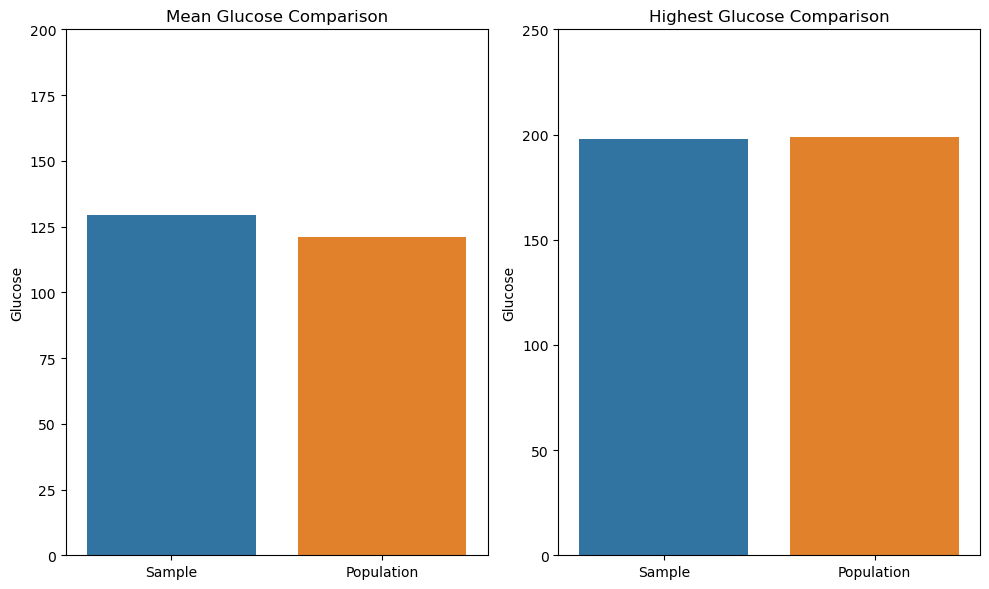

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(83)

# Take a random sample of 25 observations
sample = diabetes_data.sample(n=25)

# Calculate mean and highest Glucose values for sample and population
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

population_mean_glucose = diabetes_data['Glucose'].mean()
population_highest_glucose = diabetes_data['Glucose'].max()

# Comparison
print("Sample Mean Glucose:", sample_mean_glucose)
print("Sample Highest Glucose:", sample_highest_glucose)
print("Population Mean Glucose:", population_mean_glucose)
print("Population Highest Glucose:", population_highest_glucose)

# Visualization
plt.figure(figsize=(10, 6))

# Bar plot for mean comparison

plt.subplot(1, 2, 1)
sns.barplot(x=['Sample', 'Population'], y=[sample_mean_glucose, population_mean_glucose])
plt.title('Mean Glucose Comparison')
plt.ylabel('Glucose')
plt.ylim(0, 200)

# Bar plot for highest glucose comparison
plt.subplot(1, 2, 2)
sns.barplot(x=['Sample', 'Population'], y=[sample_highest_glucose, population_highest_glucose])
plt.title('Highest Glucose Comparison')
plt.ylabel('Glucose')
plt.ylim(0, 250)

plt.tight_layout()
plt.show()


Sample 98th Percentile BMI: 49.73199999999999
Population 98th Percentile BMI: 47.52599999999996


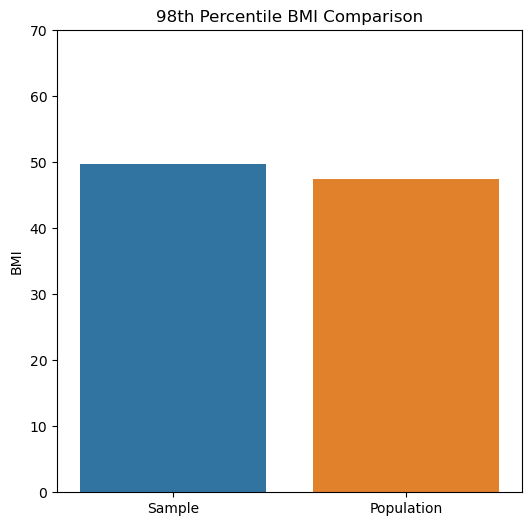

In [10]:
# Calculate the 98th percentile of BMI for sample and population
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
population_98th_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)

# Comparison
print("Sample 98th Percentile BMI:", sample_98th_percentile_bmi)
print("Population 98th Percentile BMI:", population_98th_percentile_bmi)

# Visualization
plt.figure(figsize=(6, 6))

# Bar plot for percentile comparison
sns.barplot(x=['Sample', 'Population'], y=[sample_98th_percentile_bmi, population_98th_percentile_bmi])
plt.title('98th Percentile BMI Comparison')
plt.ylabel('BMI')
plt.ylim(0, 70)

plt.show()


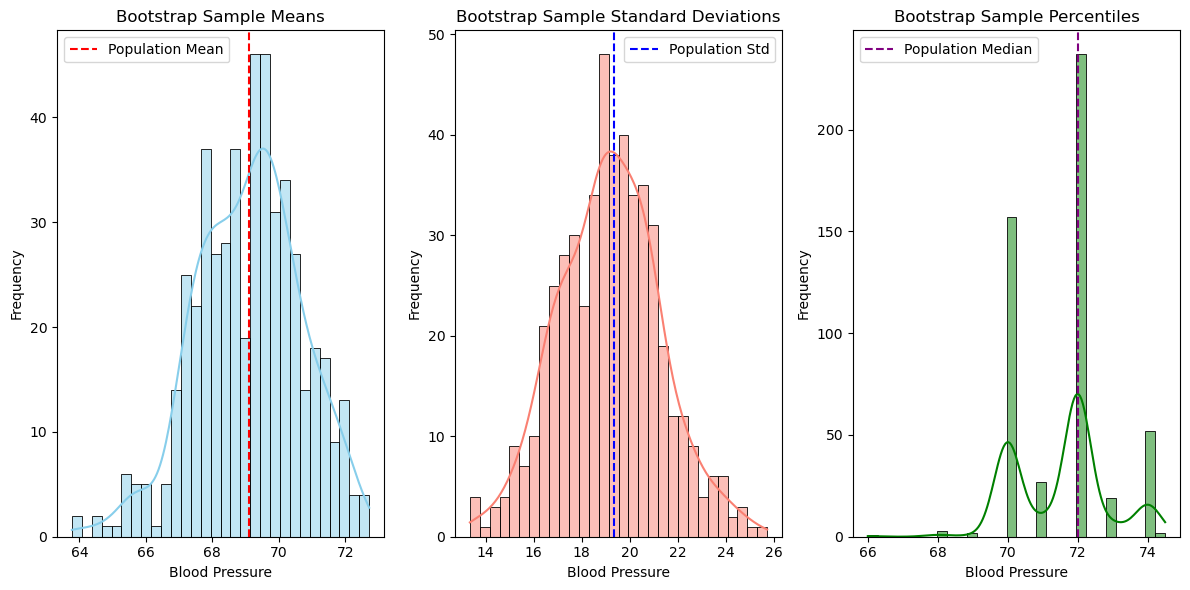

In [11]:
# Set the number of bootstrap samples and sample size
n_bootstrap_samples = 500
sample_size = 150

# Initialize lists to store statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Bootstrap sampling and calculation of statistics
for _ in range(n_bootstrap_samples):
    # Generate a bootstrap sample
    bootstrap_sample = diabetes_data['BloodPressure'].sample(n=sample_size, replace=True)
    
    # Calculate statistics for the bootstrap sample
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_std = bootstrap_sample.std()
    bootstrap_percentile = np.percentile(bootstrap_sample, 50)  # Median
    
    # Append statistics to lists
    bootstrap_means.append(bootstrap_mean)
    bootstrap_stds.append(bootstrap_std)
    bootstrap_percentiles.append(bootstrap_percentile)

# Calculate statistics for the population
population_mean_bp = diabetes_data['BloodPressure'].mean()
population_std_bp = diabetes_data['BloodPressure'].std()
population_percentile_bp = np.percentile(diabetes_data['BloodPressure'], 50)  # Median

# Visualization
plt.figure(figsize=(12, 6))

# Histogram for mean comparison
plt.subplot(1, 3, 1)
sns.histplot(bootstrap_means, kde=True, color='skyblue', bins=30)
plt.axvline(x=population_mean_bp, color='red', linestyle='--', label='Population Mean')
plt.title('Bootstrap Sample Means')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.legend()

# Histogram for standard deviation comparison
plt.subplot(1, 3, 2)
sns.histplot(bootstrap_stds, kde=True, color='salmon', bins=30)
plt.axvline(x=population_std_bp, color='blue', linestyle='--', label='Population Std')
plt.title('Bootstrap Sample Standard Deviations')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.legend()

# Histogram for percentile comparison
plt.subplot(1, 3, 3)
sns.histplot(bootstrap_percentiles, kde=True, color='green', bins=30)
plt.axvline(x=population_percentile_bp, color='purple', linestyle='--', label='Population Median')
plt.title('Bootstrap Sample Percentiles')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
